---

# IMDB 5000 -  Análise de tendência de lançamento 🎬🎦 

Análise de tendências de lançamentos: Identificar e visualizar as tendências de lançamentos de filmes ao longo do tempo, como número de lançamentos por ano, distribuição de lançamentos por gênero, etc.

---


---
# DIA 1 - IMPORTAÇÃO E ESTATÍSTICAS DESCRITIVAS  👨‍💻
---

In [1]:
# IMPORTANDO BIBLIOTECAS PRINCIPAIS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# IMPORTANDO BASE DE DADOS

df = pd.read_csv('tmdb_5000_movies.csv')
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [3]:
# RENOMEANDO AS COLUNAS

traducao = {
    'budget': 'Orçamento',
    'genres': 'Gêneros',
    'homepage': 'Página inicial',
    'id': 'ID',
    'keywords': 'Palavras-chave',
    'original_language': 'Idioma original',
    'original_title': 'Título original',
    'overview': 'Visão geral',
    'popularity': 'Popularidade',
    'production_companies': 'Empresas de produção',
    'production_countries': 'Países de produção',
    'release_date': 'Data de lançamento',
    'revenue': 'Receita',
    'runtime': 'Duração',
    'spoken_languages': 'Idiomas falados',
    'status': 'Status',
    'tagline': 'Slogan',
    'title': 'Título',
    'vote_average': 'Média de votos',
    'vote_count': 'Contagem de votos'
}

df = df.rename(columns=traducao)
df.head(2)

,Orçamento,Gêneros,Página inicial,ID,Palavras-chave,Idioma original,Título original,Visão geral,Popularidade,Empresas de produção,Países de produção,Data de lançamento,Receita,Duração,Idiomas falados,Status,Slogan,Título,Média de votos,Contagem de votos
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
# DANDO UMA OLHADA NA COLUNA DE LANÇAMENTOS

display(type(df['Data de lançamento'][0]))

#Converter representação de data em formato de string para um objeto de data no Python
 
from datetime import datetime

df['Data de lançamento'] = pd.to_datetime(df['Data de lançamento']) 

display(type(df['Data de lançamento'][0]))

str

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
# ESTATÍSTICA DESCRITIVAS

df[['Orçamento', 'Média de votos', 'Data de lançamento',  'Contagem de votos']].describe()

# VERIFICANDO SE HÁ VALORES NULOS NA COLUNA 

display(df[df['Data de lançamento'].isnull() == True]) # claramente um filme sem dados suficientes, então ...

# removendo
df = df[df['Data de lançamento'].notnull()]
display(df.head(2))


# CRIAR COLUNA COM APENAS OS ANOS DE LANÇAMENTO

df['Ano de lancamento'] = df['Data de lançamento'].dt.year.astype(int)
display(df['Ano de lancamento'])

,Orçamento,Gêneros,Página inicial,ID,Palavras-chave,Idioma original,Título original,Visão geral,Popularidade,Empresas de produção,Países de produção,Data de lançamento,Receita,Duração,Idiomas falados,Status,Slogan,Título,Média de votos,Contagem de votos
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaT,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


,Orçamento,Gêneros,Página inicial,ID,Palavras-chave,Idioma original,Título original,Visão geral,Popularidade,Empresas de produção,Países de produção,Data de lançamento,Receita,Duração,Idiomas falados,Status,Slogan,Título,Média de votos,Contagem de votos
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4798    1992
4799    2011
4800    2013
4801    2012
4802    2005
Name: Ano de lancamento, Length: 4802, dtype: int32

In [6]:
# ESTATÍSTICAS DESCRITIVAS

df[['Duração', 'Contagem de votos', 'Média de votos', 'Ano de lancamento']].describe()

,Duração,Contagem de votos,Média de votos,Ano de lancamento
count,4800.000000,4802.000000,4802.000000,4802.000000
mean,106.898125,690.361724,6.093440,2002.468763
std,22.561593,1234.674268,1.191496,12.414354
min,0.000000,0.000000,0.000000,1916.000000
25%,94.000000,54.000000,5.600000,1999.000000
50%,103.000000,235.500000,6.200000,2005.000000
75%,118.000000,737.000000,6.800000,2011.000000
max,338.000000,13752.000000,10.000000,2017.000000


---

## Observações Primárias ❗❗

&nbsp;
   * Podemos notar, por exemplo, que **75%** dos filmes tem uma duração menor do que 2 horas

   * Provavelmente esse filme com **338 min** deve ser algum ruído, outlier, necessário verificar

   * mesma observação se aplica a filme com duração **0**, necessario verificar
 
   * é necessário avaliar a relevância de filmes sem votos a depender da análise que se recomenda
   
&nbsp; 

---


---
# DIA 2 - LIMPEZA E ADEQUAÇÃO DOS DADOS  👨‍💻
---

In [7]:
# LIMPEZA DE DADOS: NULOS E DUPLICATAS

# QUAIS COLUNAS O VALOR NULO REALMENTE ATRAPALHA?

display(df[df['Página inicial'].isnull() == True].head(2)) # aqui notamos não ser necessário apagar a linha, mas preencher o NaN


,Orçamento,Gêneros,Página inicial,ID,Palavras-chave,Idioma original,Título original,Visão geral,Popularidade,Empresas de produção,...,Data de lançamento,Receita,Duração,Idiomas falados,Status,Slogan,Título,Média de votos,Contagem de votos,Ano de lancamento
15,225000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 10751...",NaN,2454,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Chronicles of Narnia: Prince Caspian,One year after their incredible adventures in ...,53.978602,"[{""name"": ""Walt Disney"", ""id"": 5888}, {""name"":...",...,2008-05-15,419651413,150.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Hope has a new face.,The Chronicles of Narnia: Prince Caspian,6.3,1630,2008
24,207000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",NaN,254,"[{""id"": 774, ""name"": ""film business""}, {""id"": ...",en,King Kong,"In 1933 New York, an overly ambitious movie pr...",61.226010,"[{""name"": ""WingNut Films"", ""id"": 11}, {""name"":...",...,2005-12-14,550000000,187.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The eighth wonder of the world.,King Kong,6.6,2337,2005


In [8]:
# colunas
for valor in traducao.values():
    display(valor)

'Orçamento'

'Gêneros'

'Página inicial'

'ID'

'Palavras-chave'

'Idioma original'

'Título original'

'Visão geral'

'Popularidade'

'Empresas de produção'

'Países de produção'

'Data de lançamento'

'Receita'

'Duração'

'Idiomas falados'

'Status'

'Slogan'

'Título'

'Média de votos'

'Contagem de votos'

---

## Pensando em um primeiro filtro

---

In [9]:
display(len(df.query("Receita == 0")['Receita']))
display(len(df['Receita']))

#29% dos filmes não tem receita é uma fatia muito grande dos filmes do dataframe, naõ é um bom filtro.

display(len(df.query("`Contagem de votos` >= 20")['Contagem de votos']))

display(len(df['Contagem de votos']))

# 86% dos filmes tem mais de 20 votos, é um bom filtro

1426

4802

4138

4802

In [10]:
df = df.query("`Contagem de votos` >= 20")

In [11]:
# filmes com duração 0

df.describe()

,Orçamento,ID,Popularidade,Receita,Duração,Média de votos,Contagem de votos,Ano de lancamento
count,4.138000e+03,4138.000000,4138.000000,4.138000e+03,4138.000000,4138.000000,4138.000000,4138.000000
mean,3.333952e+07,47549.112615,24.745454,9.534649e+07,109.038183,6.264306,799.880619,2002.352102
std,4.224039e+07,78793.779006,33.138051,1.718928e+08,20.736348,0.862912,1297.044864,12.185775
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,20.000000,1916.000000
25%,4.000000e+06,7942.500000,7.629479,1.013447e+06,95.000000,5.700000,108.000000,1999.000000
50%,2.000000e+07,12086.500000,16.172035,3.190530e+07,105.000000,6.300000,325.000000,2005.000000
75%,4.500000e+07,44935.250000,31.791242,1.102243e+08,119.000000,6.900000,882.000000,2010.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000,2016.000000


---
## Problemas

   * resolvemos o problema de **contagem de votos e média de votos iguais a zero**, mas ainda existem filmes sem informação de **Duração** e **Receita**

---

In [12]:
display(df.sort_values(by='Duração',axis=0, ascending=True).head(10))

# só há um filme com duração igual a zero, fácil de ajustar. Vamos optar por filmes com ao menos 60 minutos

df = df.query("Duração >= 60")

,Orçamento,Gêneros,Página inicial,ID,Palavras-chave,Idioma original,Título original,Visão geral,Popularidade,Empresas de produção,...,Data de lançamento,Receita,Duração,Idiomas falados,Status,Slogan,Título,Média de votos,Contagem de votos,Ano de lancamento
3809,4000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,158150,[],en,How to Fall in Love,"An accountant, who never quite grew out of his...",1.923514,"[{""name"": ""Annuit Coeptis Entertainment Inc."",...",...,2012-07-21,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,How to Fall in Love,5.2,20,2012
4709,0,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",NaN,13187,"[{""id"": 65, ""name"": ""holiday""}, {""id"": 207317,...",en,A Charlie Brown Christmas,When Charlie Brown complains about the overwhe...,8.701183,"[{""name"": ""Warner Bros. Home Video"", ""id"": 5173}]",...,1965-12-09,0,25.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"That's what Christmas is all about, Charlie Br...",A Charlie Brown Christmas,7.5,153,1965
4756,50000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",http://www.cthulhulives.org/cocmovie/index.html,20981,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 303...",en,The Call of Cthulhu,A dying professor leaves his great-nephew a co...,1.777148,"[{""name"": ""HPLHS"", ""id"": 17827}]",...,2005-01-01,0,47.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,The Call of Cthulhu,6.9,41,2005
1620,30000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/pooh/home/,51162,"[{""id"": 3905, ""name"": ""owl""}, {""id"": 4809, ""na...",en,Winnie the Pooh,"During an ordinary day in Hundred Acre Wood, W...",19.143721,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2011-04-13,14460000,63.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Oh Pooh.,Winnie the Pooh,6.8,258,2011
4673,200000,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,43595,"[{""id"": 10229, ""name"": ""singer""}, {""id"": 19484...",en,She Done Him Wrong,New York singer and nightclub owner Lady Lou h...,0.622752,"[{""name"": ""Paramount Pictures"", ""id"": 4}]",...,1933-02-09,2200000,66.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mae West gives a 'Hot Time' to the nation!,She Done Him Wrong,5.1,27,1933
2182,0,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",NaN,13682,[],en,Pooh's Heffalump Movie,Who or what exactly is a Heffalump? The lovabl...,9.031540,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2005-02-11,0,68.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,There's something new in the Hundred Acre Wood.,Pooh's Heffalump Movie,6.4,88,2005
2805,12300000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 12, ""...",NaN,12144,"[{""id"": 746, ""name"": ""vulkan""}, {""id"": 936, ""n...",en,The Land Before Time,An orphaned brontosaurus named Littlefoot sets...,28.670193,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Uni...",...,1988-11-18,84460846,69.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A new adventure is born.,The Land Before Time,7.0,640,1988
3208,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.starwars.com/tv-shows/star-wars-the...,333355,"[{""id"": 6091, ""name"": ""war""}, {""id"": 161176, ""...",en,Star Wars: Clone Wars (Volume 1),"The Saga continues with the Emmy-winning ""Star...",1.881466,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Car...",...,2005-03-21,0,69.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Star Wars: Clone Wars: Volume 1,8.0,27,2005
4441,858000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 18, ""...",http://movies.disney.com/bambi,3170,"[{""id"": 5774, ""name"": ""forest""}, {""id"": 10683,...",en,Bambi,Bambi's tale unfolds from season to season as ...,47.651878,"[{""name"": ""Walt Disney Productions"", ""id"": 3166}]",...,1942-08-14,267447150,70.0,"[{""iso_639_1"": ""en"", ""n

In [13]:
df.describe()

,Orçamento,ID,Popularidade,Receita,Duração,Média de votos,Contagem de votos,Ano de lancamento
count,4.135000e+03,4135.000000,4135.000000,4.135000e+03,4135.000000,4135.000000,4135.000000,4135.000000
mean,3.336272e+07,47537.100363,24.760408,9.541566e+07,109.099879,6.264111,800.409190,2002.358162
std,4.224689e+07,78800.694796,33.145305,1.719359e+08,20.610410,0.862795,1297.365904,12.175349
min,0.000000e+00,5.000000,0.011697,0.000000e+00,63.000000,1.900000,20.000000,1916.000000
25%,4.000000e+06,7927.500000,7.654747,1.078142e+06,95.000000,5.700000,108.000000,1999.000000
50%,2.000000e+07,12079.000000,16.183746,3.191279e+07,105.000000,6.300000,325.000000,2005.000000
75%,4.500000e+07,44927.500000,31.792472,1.104291e+08,119.000000,6.900000,882.500000,2010.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000,2016.000000


---

## Por enquanto vamos manter como está em relação a Receita = 0 e Orcamento = 0

Vamos averiguar os casos de filmes com **Durações** incomuns e esses altos valores para **Popularidade**

---


In [14]:
display(df.sort_values(by='Popularidade',axis=0, ascending=False).head(2))

,Orçamento,Gêneros,Página inicial,ID,Palavras-chave,Idioma original,Título original,Visão geral,Popularidade,Empresas de produção,...,Data de lançamento,Receita,Duração,Idiomas falados,Status,Slogan,Título,Média de votos,Contagem de votos,Ano de lancamento
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,2015-06-17,1156730962,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,2015
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,2014-11-05,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,2014


---

## Por incrível que pareça, não me aparenta ser um `outlier` em popularidade. Acredito que há muitos `filmes impopulares` que puxam as estatísticas para `baixo`

---

In [15]:
display(df.sort_values(by='Duração',axis=0, ascending=False).head(2))

,Orçamento,Gêneros,Página inicial,ID,Palavras-chave,Idioma original,Título original,Visão geral,Popularidade,Empresas de produção,...,Data de lançamento,Receita,Duração,Idiomas falados,Status,Slogan,Título,Média de votos,Contagem de votos,Ano de lancamento
2384,18000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,43434,"[{""id"": 1419, ""name"": ""gun""}, {""id"": 7336, ""na...",en,Carlos,"The story of Venezuelan revolutionary, Ilich R...",1.138383,"[{""name"": ""Egoli Tossell Film AG"", ""id"": 2254}...",...,2010-05-19,871279,338.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,The man who hijacked the world,Carlos,6.7,50,2010
1922,0,"[{""id"": 10752, ""name"": ""War""}, {""id"": 18, ""nam...",NaN,10655,"[{""id"": 393, ""name"": ""civil war""}, {""id"": 4097...",en,Gettysburg,Summer 1863. The Confederacy pushes north into...,5.529035,"[{""name"": ""TriStar Television"", ""id"": 8609}, {...",...,1993-10-08,25000000,254.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Gettysburg,6.6,90,1993


---

## Primeiro filme parece ser na verdade uma `minisérie` vamos então `retira-lo`

---

In [16]:
df = df.query('Duração < 338.0')

In [17]:
df.describe()

,Orçamento,ID,Popularidade,Receita,Duração,Média de votos,Contagem de votos,Ano de lancamento
count,4.134000e+03,4134.000000,4134.000000,4.134000e+03,4134.000000,4134.000000,4134.000000,4134.000000
mean,3.336644e+07,47538.092888,24.766122,9.543853e+07,109.044509,6.264006,800.590711,2002.356313
std,4.225133e+07,78810.201481,33.147278,1.719504e+08,20.302990,0.862873,1297.470330,12.176242
min,0.000000e+00,5.000000,0.011697,0.000000e+00,63.000000,1.900000,20.000000,1916.000000
25%,4.000000e+06,7920.250000,7.664608,1.088933e+06,95.000000,5.700000,108.000000,1999.000000
50%,2.000000e+07,12031.000000,16.186159,3.195640e+07,105.000000,6.300000,325.000000,2005.000000
75%,4.500000e+07,44935.250000,31.792718,1.105286e+08,119.000000,6.900000,882.750000,2010.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,254.000000,8.500000,13752.000000,2016.000000


In [18]:
# Obtém a contagem de filmes por ano
contagem_ano_de_lancamento = df['Ano de lancamento'].value_counts()
contagem_ano_de_lancamento.sort_values(axis=0, ascending=True).head(25)

1925    1
1929    1
1941    1
1916    1
1934    1
1935    1
1938    1
1932    1
1936    1
1948    1
1958    1
1950    1
1927    1
1937    1
1942    2
1945    2
1949    2
1957    2
1947    2
1955    2
1959    2
1951    2
1933    2
1952    3
1956    3
Name: Ano de lancamento, dtype: int64

---

## Observamos, portanto, que existem muitos anos com poucos filmes, o que não é interessante para nossa análise.

---

In [19]:
# Filtra apenas os anos que tiveram mais de 15 filmes
anos_mais_de_15_filmes = contagem_ano_de_lancamento[contagem_ano_de_lancamento > 15].index

# Filtra o DataFrame original mantendo apenas os anos desejados
df = df[df['Ano de lancamento'].isin(anos_mais_de_15_filmes)]
display(df.shape)
df.describe()

(3918, 21)

,Orçamento,ID,Popularidade,Receita,Duração,Média de votos,Contagem de votos,Ano de lancamento
count,3.918000e+03,3918.000000,3918.000000,3.918000e+03,3918.000000,3918.000000,3918.000000,3918.000000
mean,3.487534e+07,49601.712353,24.976422,9.807173e+07,108.269270,6.223175,816.342777,2004.433640
std,4.283194e+07,80403.171462,33.573364,1.750126e+08,19.192832,0.850997,1315.320626,8.021739
min,0.000000e+00,5.000000,0.011697,0.000000e+00,63.000000,1.900000,20.000000,1980.000000
25%,5.000000e+06,8410.000000,7.747672,7.199450e+05,95.000000,5.700000,111.000000,2000.000000
50%,2.000000e+07,12274.000000,16.408233,3.349984e+07,105.000000,6.300000,333.000000,2006.000000
75%,5.000000e+07,49021.750000,31.953797,1.149447e+08,118.000000,6.800000,902.750000,2011.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,254.000000,8.500000,13752.000000,2016.000000


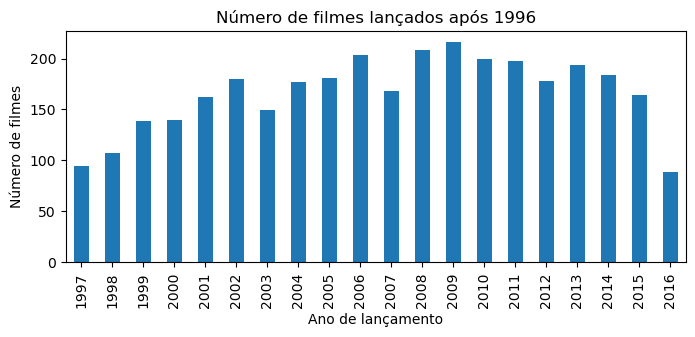

In [55]:
vinte_anos = df.query('`Ano de lancamento` > 1996')

fig = plt.figure(figsize=(8, 3))

# Plotar o gráfico de contagem dos filmes por ano de lançamento
vinte_anos['Ano de lancamento'].value_counts().sort_index().plot(kind='bar')

plt.title('Número de filmes lançados após 1996')
plt.xlabel('Ano de lançamento')
plt.ylabel('Número de filmes')
plt.show()


---

## podemos notar inicialmente que a partir de `2001` o número médio de filmes por anos tende a ser `estável`, com variações periódicas parecidas

---

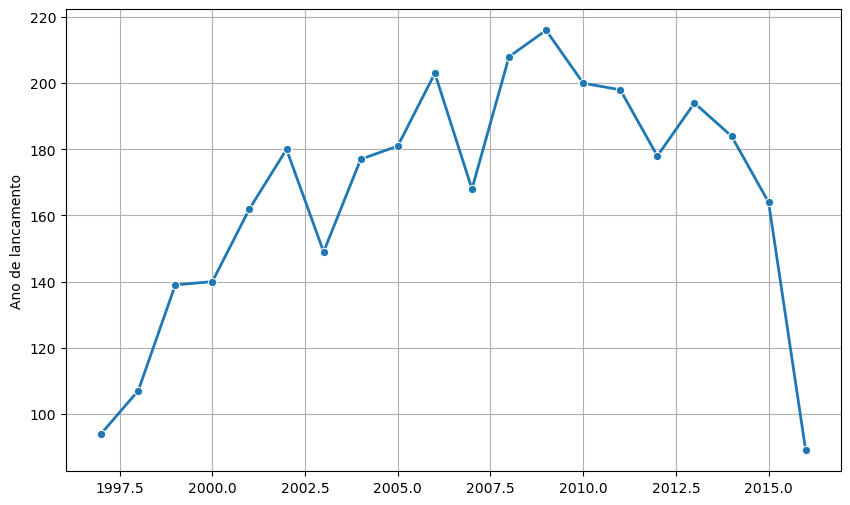

In [31]:
# tentar outro gráfico, o de Linha

contagem_filmes = vinte_anos['Ano de lancamento'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x=contagem_filmes.index, y=contagem_filmes, lw=2, marker='o')
plt.grid(True)

---
## Novas Observações

>Tendência geral: Podemos observar a tendência geral do número de filmes lançados ao longo dos anos. Por exemplo, parece haver um aumento na quantidade de filmes lançados a partir de 1999 até 2010, seguido por uma queda gradual nos anos subsequentes.

>Anos de destaque: Podemos identificar os anos em que houve um maior número de filmes lançados. Por exemplo, em 2008 e 2009, foram lançados 208 e 216 filmes, respectivamente, o que indica um período de alta atividade na indústria cinematográfica.
---

&nbsp;

---

# DIA 3 - Analise Gráfica e outros Insights  👨‍💻

---
&nbsp;

In [22]:
df.info() # ver se tem dados faltando, dados nulos ou algo assim

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3918 entries, 0 to 4798
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Orçamento             3918 non-null   int64         
 1   Gêneros               3918 non-null   object        
 2   Página inicial        1548 non-null   object        
 3   ID                    3918 non-null   int64         
 4   Palavras-chave        3918 non-null   object        
 5   Idioma original       3918 non-null   object        
 6   Título original       3918 non-null   object        
 7   Visão geral           3918 non-null   object        
 8   Popularidade          3918 non-null   float64       
 9   Empresas de produção  3918 non-null   object        
 10  Países de produção    3918 non-null   object        
 11  Data de lançamento    3918 non-null   datetime64[ns]
 12  Receita               3918 non-null   int64         
 13  Duração           

In [29]:
df.fillna('Não tem', axis = 0, inplace = True)

Text(0.5, 1.0, '1999 - 2016')

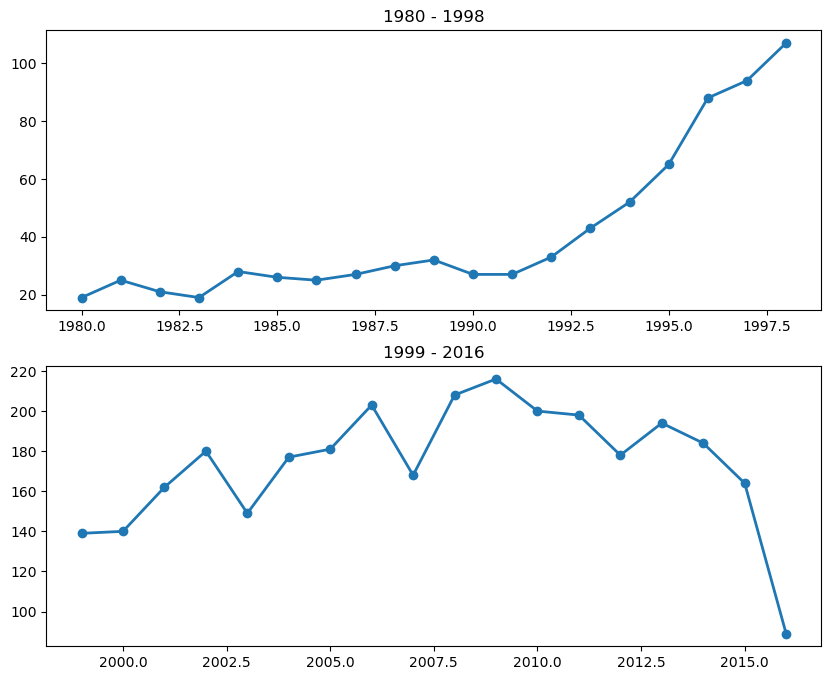

In [74]:
#Vamos comparar a tendência dos filmes de 1980 - 1998 com 1999 - 2016

oitenta_noventa = df.query('`Ano de lancamento` >= 1980 and `Ano de lancamento` <= 1998')
contagem_filmes_1 = oitenta_noventa['Ano de lancamento'].value_counts().sort_index()

noventa_dois_mil = df.query('`Ano de lancamento` >= 1999 and `Ano de lancamento` <= 2016')
contagem_filmes_2 = noventa_dois_mil['Ano de lancamento'].value_counts().sort_index()

# Criar a figura e os subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# plot 1
axes[0].plot(contagem_filmes_1, lw=2, marker='o')
axes[0].set_title('1980 - 1998')

# plot 2
axes[1].plot(contagem_filmes_2, lw=2, marker='o')
axes[1].set_title('1999 - 2016')



---
## Observações interessantes

> Podemos notar um **crescimento** expressivo no número de filmes por ano na **década de 90**, um dos motivos pode ser o **avanço da tecnologia** na indústria cinematográfica, que possibilitou uma maior produção e distribuição de filmes.

> Outro motivo também pode ter sido o surgimento do **CD** e **DVD**, que barateou muito o acesso a filmes em locadoras e talvez também encurtado o tempo que demorava entre o filme no cinema e em mídias físicas. Com isso, o cinema teria que produzir mais conteúdo para manter o interesse em produções novas. Porém, estamos apenas **supondo**

> nos filmes da era **2000** notamos que já se estabeleceu um número relativamente alto de filmes por ano, mas com bastante variações. Diferente da **década de 90** não há somente um aumento na produção, mas também oscilações negativas. 


---
# Quais meses do são mais movimentados em relação a lançamentos de filmes?
---

In [78]:
df['mes_lancamento'] = pd.to_datetime(df['Data de lançamento']).dt.month
grupo_por_mês = df.groupby('mes_lancamento')

In [80]:
grupo_por_mês['mes_lancamento'].value_counts()

mes_lancamento  mes_lancamento
1               1                 273
2               2                 277
3               3                 303
4               4                 278
5               5                 295
6               6                 308
7               7                 316
8               8                 340
9               9                 500
10              10                371
11              11                274
12              12                383
Name: mes_lancamento, dtype: int64

In [135]:
filmes_por_mes = pd.DataFrame(grupo_por_mês['Título original'].count())
filmes_por_mes.index.name = 'mes'
filmes_por_mes.columns = ['quantidade']
filmes_por_mes

,quantidade
mes,
1,273
2,277
3,303
4,278
5,295
6,308
7,316
8,340
9,500


In [108]:
dicionario_meses = {1:'Jan',2:'Fev',3:'Mar',4:'Abr',
                    5:'Mai',6:'Jun',7:'Jul',8:'Ago',
                    9:'Set',10:'Out',11:'Nov',12:'Dez'}
filmes_por_mes.index = filmes_por_mes.index.map(dicionario_meses)

meses = list(dicionario_meses.values())
print(meses)

filmes_por_mes



['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']


,quantidade
mes,
Jan,273
Fev,277
Mar,303
Abr,278
Mai,295
Jun,308
Jul,316
Ago,340
Set,500


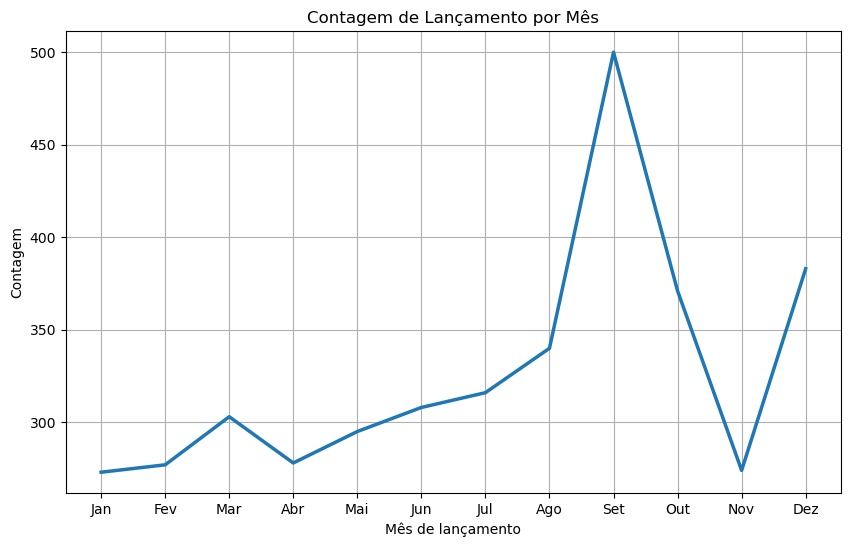

In [109]:
meses = filmes_por_mes.index
valores = grupo_por_mês['mes_lancamento'].value_counts()

plt.figure(figsize=(10, 6))

# Plotagem do gráfico de barras
plt.plot(meses, valores,linewidth=2.5)

# Configurações do gráfico
plt.xlabel('Mês de lançamento')
plt.ylabel('Contagem')
plt.title('Contagem de Lançamento por Mês')
plt.grid(True)

# Exibição do gráfico
plt.show()

---

> levando em consideração **TODOS** os anos de lançamento dos filmes do Dataset temos o resultado acima. Não corresponde a intuição de maior número de lançamentos em períodos de **Férias**

> **SETEMBRO** é muito deslocado dos demais 

---
## Para fins de comparação vamos escolher um ano em espefífico: 2012
---

In [110]:
df_2012 = df.query('`Ano de lancamento` == 2012')
df_2012.head(2)

,Orçamento,Gêneros,Página inicial,ID,Palavras-chave,Idioma original,Título original,Visão geral,Popularidade,Empresas de produção,...,Receita,Duração,Idiomas falados,Status,Slogan,Título,Média de votos,Contagem de votos,Ano de lancamento,mes_lancamento
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012,7
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012,3


In [111]:
grupo_por_mês_2012 = df_2012.groupby('mes_lancamento')

filmes_por_mes_2012 = pd.DataFrame(grupo_por_mês_2012['Título original'].count())
filmes_por_mes_2012.index.name = 'mes'
filmes_por_mes_2012.columns = ['quantidade']

dicionario_meses = {1:'Jan',2:'Fev',3:'Mar',4:'Abr',
                    5:'Mai',6:'Jun',7:'Jul',8:'Ago',
                    9:'Set',10:'Out',11:'Nov',12:'Dez'}
filmes_por_mes_2012.index = filmes_por_mes_2012.index.map(dicionario_meses)

meses = list(dicionario_meses.values())
print(meses)

filmes_por_mes_2012



['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']


,quantidade
mes,
Jan,11
Fev,10
Mar,15
Abr,18
Mai,14
Jun,17
Jul,7
Ago,23
Set,28


Text(0.5, 1.0, '2012')

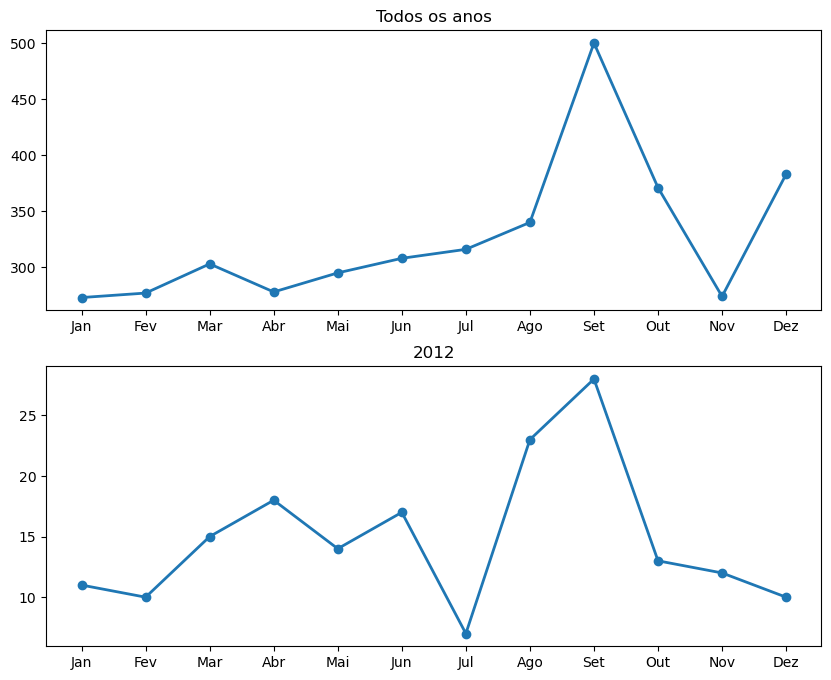

In [112]:
meses_2012 = filmes_por_mes_2012.index
valores_2012 = grupo_por_mês_2012['mes_lancamento'].value_counts()

# Criar a figura e os subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# plot 1
axes[0].plot(meses,valores, lw=2, marker='o')
axes[0].set_title('Todos os anos')

# plot 2
axes[1].plot(meses_2012, valores_2012, lw=2, marker='o')
axes[1].set_title('2012')


---
## Os meses finais apresentam uma tendência parecida com o resultado de todos os filmes, com uma grande elevação em **SETEMBRO**
---

# Vamos agora, em vez de considerar apenas um ano, coletar amostras de períodos diferentes.

In [123]:
def Amostra_anos (x, y):
    df_x = df.query('`Ano de lancamento` >= @x and `Ano de lancamento` <= @y')
    
    grupo_por_mês = df_x.groupby('mes_lancamento')
    
    filmes_por_mes = pd.DataFrame(grupo_por_mês['Título original'].count())
    filmes_por_mes.index.name = 'mes'
    filmes_por_mes.columns = ['quantidade']

    dicionario_meses = {1:'Jan',2:'Fev',3:'Mar',4:'Abr',
                    5:'Mai',6:'Jun',7:'Jul',8:'Ago',
                    9:'Set',10:'Out',11:'Nov',12:'Dez'}
    filmes_por_mes.index = filmes_por_mes.index.map(dicionario_meses)

    #meses = list(dicionario_meses.values())
    #print(meses)
    
    meses = filmes_por_mes.index
    valores = grupo_por_mês['mes_lancamento'].value_counts()


    return meses, valores

In [127]:
meses_1, Valores_1 = Amostra_anos (1980, 1988)
meses_2, Valores_2 = Amostra_anos (1989, 1997)
meses_3, Valores_3 = Amostra_anos (1998, 2006)
meses_4, Valores_4 = Amostra_anos (2007, 2016)

---

     no código acima estava sem consegui resolver um problema na função, vou armazenar a resposta aqui para não perder:

O problema ocorre porque a expressão `x` e `y` na função `Amostra_anos` não está sendo substituída corretamente no comando `df.query()`. Isso acontece porque as variáveis `x` e `y` estão sendo interpretadas como nomes de colunas no DataFrame `df`, em vez de seus valores reais.

Para resolver o problema, você pode modificar a função `Amostra_anos` da seguinte maneira:

```python
def Amostra_anos (x, y):
    df_x = df.query('`Ano de lancamento` >= @x and `Ano de lancamento` <= @y')
    
    # Restante do código...
```

Ao usar o símbolo `@` antes das variáveis `x` e `y` na expressão `df.query()`, você indica ao Pandas que essas variáveis devem ser substituídas por seus valores correspondentes.

Com essa modificação, o erro deve ser resolvido e a função `Amostra_anos` deve funcionar corretamente.

Text(0.5, 1.0, '2007 - 2016')

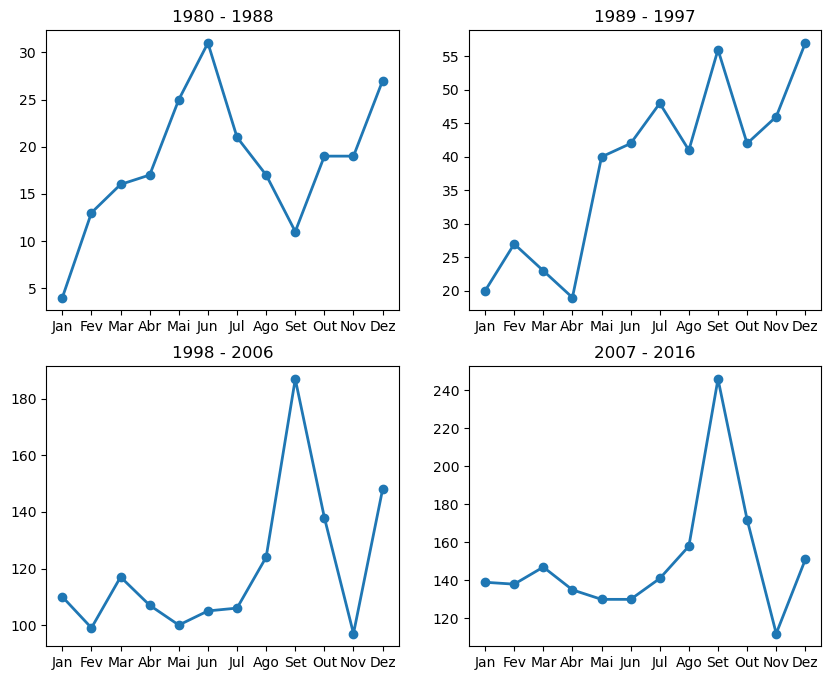

In [128]:
# Criar a figura e os subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# plot 1
axes[0,0].plot(meses_1,Valores_1, lw=2, marker='o')
axes[0,0].set_title('1980 - 1988')

# plot 2
axes[0,1].plot(meses_2, Valores_2, lw=2, marker='o')
axes[0,1].set_title('1989 - 1997')

# plot 3
axes[1,0].plot(meses_3, Valores_3, lw=2, marker='o')
axes[1,0].set_title('1998 - 2006')

# plot 4
axes[1,1].plot(meses_4, Valores_4, lw=2, marker='o')
axes[1,1].set_title('2007 - 2016')

---
## Observações interessantes

> Como ja haviamos notado existe claramente alguma mudança no funcionamento da industria cinematográfica depois da **década de 80**, de **90** em diante há uma "padronização" nas **temporadas** de lançamentos de filme.

> uma diferença da **90** e dos anos **2000** é que o crescimento da industria em 90 foi **exponencial**. Então precebe-se que a alta temporada começa em maio e depois não para de crescer
---